# Online Sales Project
This project provides a detailed analysis of global online sales data to identify key seasonal patterns and growth opportunities. It explores how different product categories perform across regions and evaluates the impact of payment methods on revenue. The insights will help optimize inventory and marketing strategies by identifying top-selling products within each category.

# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Importing The Dataset

In [7]:
with open('Online Sales Data.csv') as r:
    raw_file = pd.read_csv(r)
raw_file

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [8]:
# making copy for having original file without changing
df = raw_file.copy()

## Initial inspecting

In [9]:
df.dtypes

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [11]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [12]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [13]:
df.shape[0] == len(df['Transaction ID'].unique())

True

In [14]:
df['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [15]:
df['Product Category'].value_counts()

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64

In [16]:
len(df['Product Name'].unique())

232

In [17]:
df['Product Name'].value_counts()

Product Name
Dyson Supersonic Hair Dryer                         2
The Girl with the Dragon Tattoo by Stieg Larsson    2
Keurig K-Elite Coffee Maker                         2
The Silent Patient by Alex Michaelides              2
Dune by Frank Herbert                               2
                                                   ..
LG OLED TV                                          1
Uniqlo Ultra Light Down Jacket                      1
Sunday Riley Good Genes                             1
On Running Cloud Shoes                              1
Yeti Rambler 20 oz Tumbler                          1
Name: count, Length: 232, dtype: int64

In [18]:
df['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [19]:
df['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Debit Card'], dtype=object)

## Extracting the Day of the Week and month of the year from Dates

In [20]:
date=df['Date']
date=pd.to_datetime(date)
date

0     2024-01-01
1     2024-01-02
2     2024-01-03
3     2024-01-04
4     2024-01-05
         ...    
235   2024-08-23
236   2024-08-24
237   2024-08-25
238   2024-08-26
239   2024-08-27
Name: Date, Length: 240, dtype: datetime64[ns]

In [21]:
# day of the week
day_of_week=date.dt.day_name()
day_of_week

0         Monday
1        Tuesday
2      Wednesday
3       Thursday
4         Friday
         ...    
235       Friday
236     Saturday
237       Sunday
238       Monday
239      Tuesday
Name: Date, Length: 240, dtype: object

In [22]:
# month of the year
month_of_year=date.dt.month_name()
month_of_year

0      January
1      January
2      January
3      January
4      January
        ...   
235     August
236     August
237     August
238     August
239     August
Name: Date, Length: 240, dtype: object

## Adding day of the week and month of the year to dataframe

In [23]:
df['day of the week']=day_of_week
df['month of the year']=month_of_year
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,day of the week,month of the year
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,Monday,January
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,Tuesday,January
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,Wednesday,January
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,Thursday,January
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,Friday,January


## Reordering the dataframe

In [24]:
columns=df.columns
columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region', 'Payment Method',
       'day of the week', 'month of the year'],
      dtype='object')

In [25]:
column_names_reordered=['Transaction ID', 'Date',
       'day of the week','month of the year', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region', 'Payment Method' ]
df=df[column_names_reordered]
df

,Transaction ID,Date,day of the week,month of the year,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Monday,January,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Tuesday,January,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Wednesday,January,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Thursday,January,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Friday,January,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Friday,August,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Saturday,August,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Sunday,August,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Monday,August,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


# Analyzing Sales Trends Over Time

In [26]:
x=df['day of the week'].value_counts()
x

day of the week
Monday       35
Tuesday      35
Wednesday    34
Thursday     34
Friday       34
Saturday     34
Sunday       34
Name: count, dtype: int64

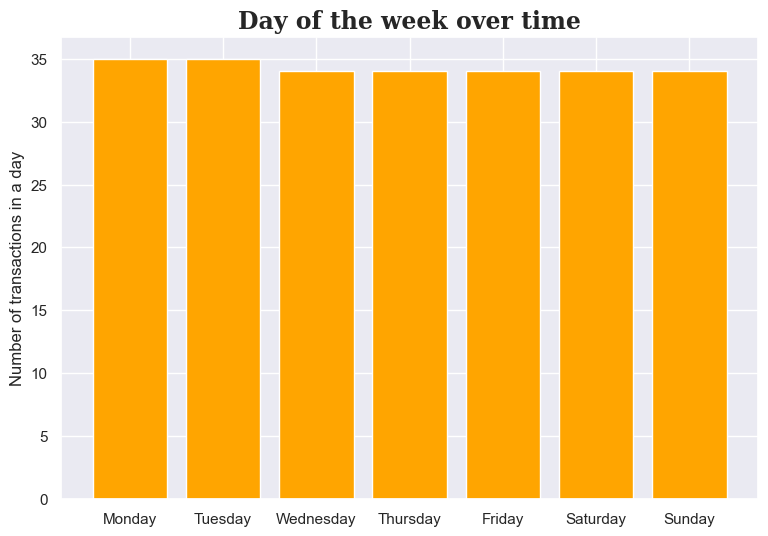

In [27]:
plt.figure(figsize=(9,6))
title_font = {'family': 'serif',
              'weight': 'bold',
              'size': 17}
days = [0, 1, 2, 3, 4, 5, 6]
plt.title('Day of the week over time',fontdict=title_font)
plt.ylabel('Number of transactions in a day',fontdict={'size':12})
plt.bar(x.index,x,color='orange')
plt.show()

## Total revenue in each day of the week

In [28]:
df

,Transaction ID,Date,day of the week,month of the year,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Monday,January,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Tuesday,January,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Wednesday,January,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Thursday,January,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Friday,January,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Friday,August,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Saturday,August,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Sunday,August,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Monday,August,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [29]:
day_revenue_group=df.groupby('day of the week')['Total Revenue'].sum()
day_revenue_group=day_revenue_group.iloc[[1,5,6,4,0,2,3]]
day_revenue_group

day of the week
Monday       12253.35
Tuesday      13518.34
Wednesday    10402.14
Thursday      8827.96
Friday       12918.74
Saturday     11494.02
Sunday       11153.30
Name: Total Revenue, dtype: float64

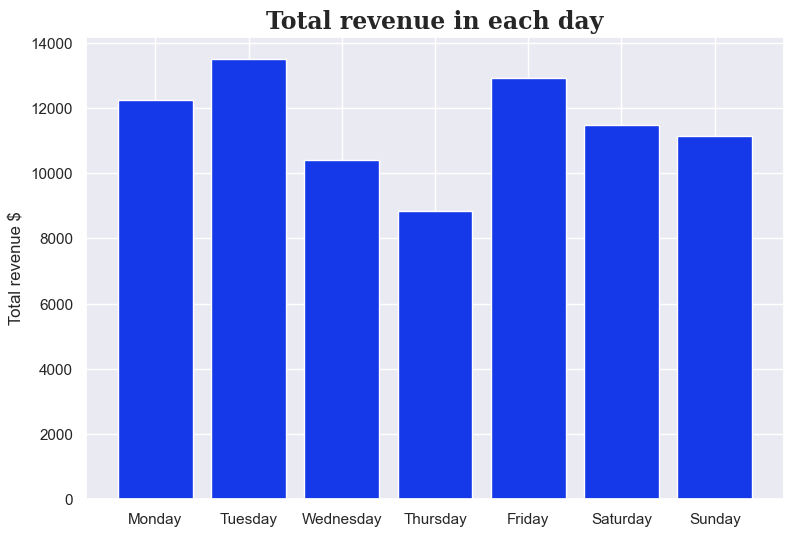

In [30]:
plt.figure(figsize=(9,6))
title_font = {'family': 'serif',
              'weight': 'bold',
              'size': 17}
days = [0, 1, 2, 3, 4, 5, 6]
plt.title('Total revenue in each day',fontdict=title_font)
plt.ylabel('Total revenue $',fontdict={'size':12})
plt.bar(day_revenue_group.index,day_revenue_group.values,color='#1538e9')
plt.show()

## Checkpoint_1

In [31]:
df.to_csv('checkpoint_1',index=False)

In [32]:
df=pd.read_csv('checkpoint_1')
df

,Transaction ID,Date,day of the week,month of the year,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Monday,January,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Tuesday,January,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Wednesday,January,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Thursday,January,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Friday,January,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Friday,August,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Saturday,August,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Sunday,August,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Monday,August,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


## Total revenue in each month of the year

In [33]:
x_group=df.groupby('month of the year')['Total Revenue'].sum()
x_group=x_group.sort_index()
x_group

month of the year
April       12451.69
August       7278.11
February    10803.37
January     14548.32
July         6797.08
June         7384.55
March       12849.24
May          8455.49
Name: Total Revenue, dtype: float64

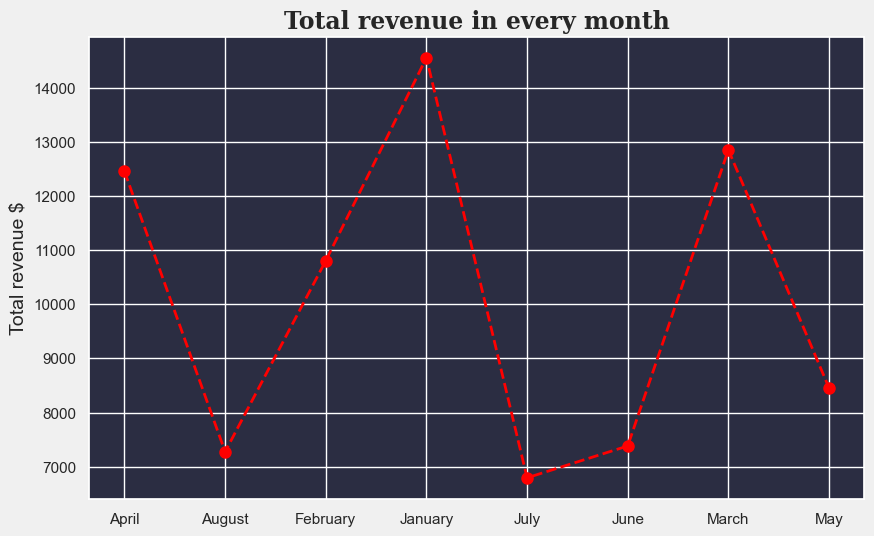

In [34]:
sns.set()
fig,ax=plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#f0f0f0')
ax.set_facecolor('#2b2d42')
title_font = {'family': 'serif',
              'weight': 'bold',
              'size': 17}
plt.ylabel('Total revenue $',fontdict={'size':14})
plt.title('Total revenue in every month',fontdict=title_font)
plt.plot(x_group.index,x_group.values,color='red',marker='o', linestyle='--',linewidth=2,markersize=8)
plt.show()

## Popularity of different product categories across regions

In [35]:
category_unit_sold=df.groupby(['Product Category','Region'])['Units Sold'].sum().reset_index()
category_unit_sold=category_unit_sold.sort_values('Region')
category_unit_sold

,Product Category,Region,Units Sold
2,Clothing,Asia,145
5,Sports,Asia,88
0,Beauty Products,Europe,46
4,Home Appliances,Europe,59
1,Books,North America,114
3,Electronics,North America,66


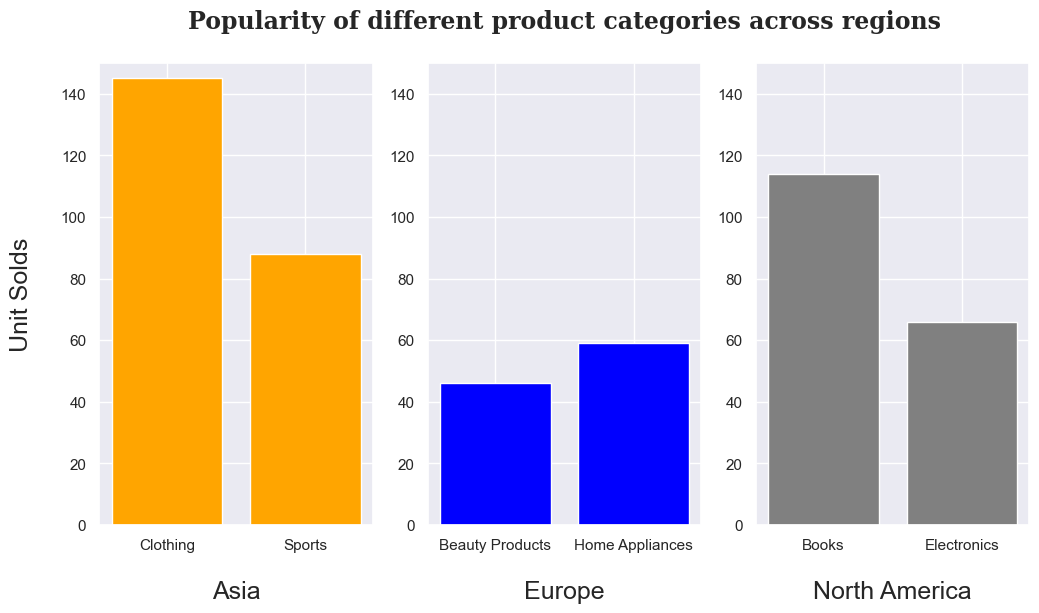

In [36]:
fg,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,6))
ax1.bar(category_unit_sold['Product Category'].iloc[0:2],category_unit_sold['Units Sold'].iloc[0:2],color='orange')
ax2.bar(category_unit_sold['Product Category'].iloc[2:4],category_unit_sold['Units Sold'].iloc[2:4],color='blue')
ax3.bar(category_unit_sold['Product Category'].iloc[4:6],category_unit_sold['Units Sold'].iloc[4:6],color='gray')
title_font = {'family': 'serif',
              'weight': 'bold',
              'size': 17}
plt.title('Popularity of different product categories across regions',fontdict=title_font,x=-0.7,pad=25)
ax1.set_xlabel('Asia',labelpad=20,fontsize=18)
ax2.set_xlabel('Europe',labelpad=20,fontsize=18)
ax3.set_xlabel('North America',labelpad=20,fontsize=18)
ax1.set_ylabel('Unit Solds',labelpad=20,fontsize=18)
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(0, 150) 
plt.show()

 ## Impact of payment methods on number of sales 

In [37]:
payment_method_categories=df['Payment Method'].value_counts().reset_index()
payment_method_categories

,Payment Method,count
0,Credit Card,120
1,PayPal,80
2,Debit Card,40


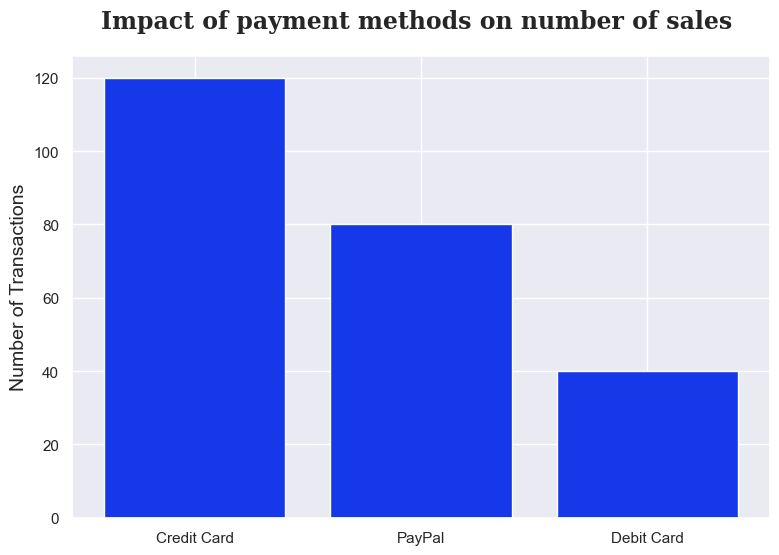

In [38]:
plt.figure(figsize=(9,6))
title_font = {'family': 'serif',
              'weight': 'bold',
              'size': 17}
plt.title('Impact of payment methods on number of sales ',fontdict=title_font,pad=20)
plt.ylabel('Number of Transactions',fontdict={'size':14})
plt.bar(payment_method_categories['Payment Method'],payment_method_categories['count'],color='#1538e9')
plt.show()

## Identifying top-selling products within each category to optimize inventory and marketing strategies

In [44]:
top_selling_group=df.groupby(['Product Name','Product Category'])['Units Sold'].sum().reset_index()
top_5_sold=top_selling_group.sort_values(by='Units Sold',ascending=False).iloc[:5]
top_5_sold

,Product Name,Product Category,Units Sold
95,Hanes ComfortSoft T-Shirt,Clothing,10
183,The Catcher in the Rye by J.D. Salinger,Books,7
227,Yeti Rambler Tumbler,Sports,6
134,Nike Air Force 1,Clothing,6
75,Gap Essential Crewneck T-Shirt,Clothing,6


In [40]:
print(top_5_sold['Product Name'])

95                   Hanes ComfortSoft T-Shirt
183    The Catcher in the Rye by J.D. Salinger
227                       Yeti Rambler Tumbler
134                           Nike Air Force 1
75              Gap Essential Crewneck T-Shirt
Name: Product Name, dtype: object


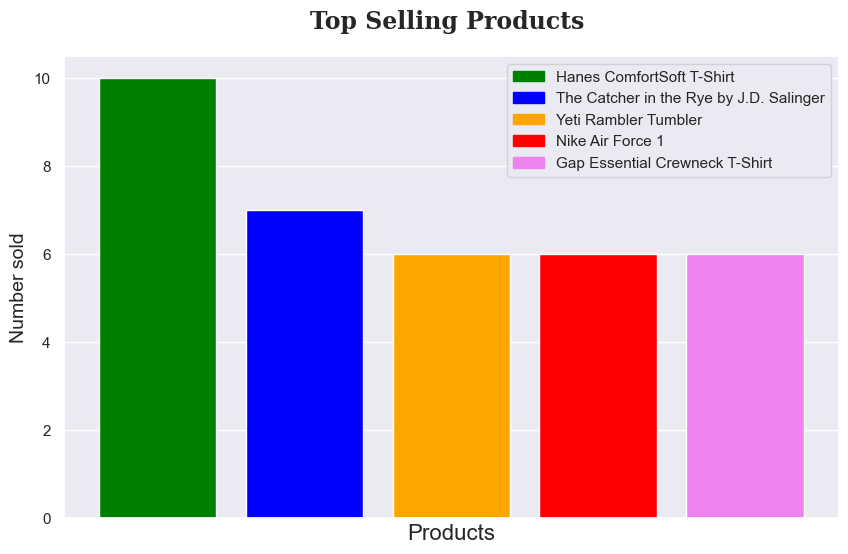

In [41]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10,6))
title_font = {'family': 'serif',
              'weight': 'bold',
              'size': 17}
plt.title('Top Selling Products ',fontdict=title_font,pad=20)
plt.ylabel('Number sold',fontdict={'size':14})
colors=['green','blue','orange','red','violet']
plt.bar(top_5_sold['Product Name'],top_5_sold['Units Sold'],color=colors)
legend_labels=['Hanes ComfortSoft T-Shirt','The Catcher in the Rye by J.D. Salinger','Yeti Rambler Tumbler','Nike Air Force 1','Gap Essential Crewneck T-Shirt']
legend_patches=[mpatches.Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches, loc="upper right")
plt.xticks([])
plt.xlabel('Products',fontsize=16)
plt.show()

In [45]:
df

,Transaction ID,Date,day of the week,month of the year,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Monday,January,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Tuesday,January,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Wednesday,January,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Thursday,January,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Friday,January,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Friday,August,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Saturday,August,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Sunday,August,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Monday,August,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


## Evaluating Product Performance by Region

In [80]:
group_product_region = df.groupby(['Product Name','Region'])['Units Sold'].sum().reset_index()
group_product_region=group_product_region.sort_values(by=['Region','Units Sold'],ascending=[True,False])
group_product_region.reset_index(inplace=True)
del group_product_region['index']
top3_products=group_product_region.groupby('Region').head(3).reset_index(drop=True)
top3_products

,Product Name,Region,Units Sold
0,Hanes ComfortSoft T-Shirt,Asia,10
1,Gap Essential Crewneck T-Shirt,Asia,6
2,Nike Air Force 1,Asia,6
3,Dyson Supersonic Hair Dryer,Europe,3
4,Eufy RoboVac 11S,Europe,3
5,Instant Pot Duo,Europe,3
6,The Catcher in the Rye by J.D. Salinger,North America,7
7,The Girl with the Dragon Tattoo by Stieg Larsson,North America,5
8,The Silent Patient by Alex Michaelides,North America,5


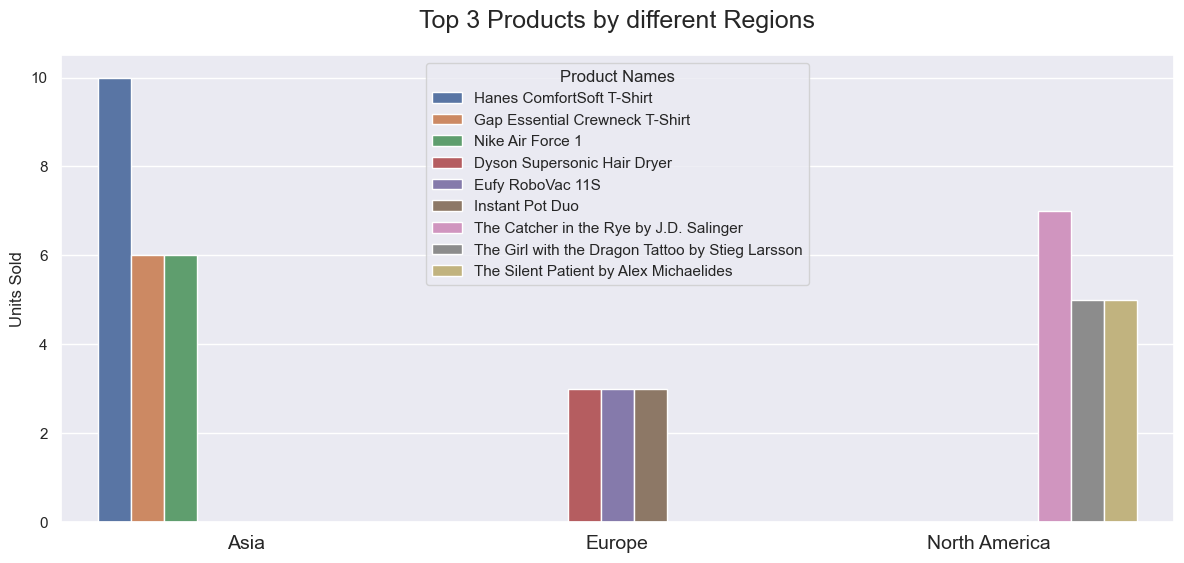

In [105]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top3_products, x='Region', y='Units Sold', hue='Product Name')

plt.title('Top 3 Products by different Regions',fontdict={'size':18},pad=20)
plt.ylabel('Units Sold')
plt.xticks(fontsize=14)
plt.legend(title='Product Names')
plt.tight_layout() 
plt.xlabel('')
plt.show()